Question:
How does increased life expectancy impact population and age demographics?

In [19]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [20]:
from pandas import read_csv
filename = 'project1data.csv'
tables = read_csv(filename, header=0, index_col=0, decimal='M');

In [21]:
def plot_results( un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [22]:
life_expectancy = tables._expectancyx1000/1000
birth_rate = tables.birthrate10000/10000;

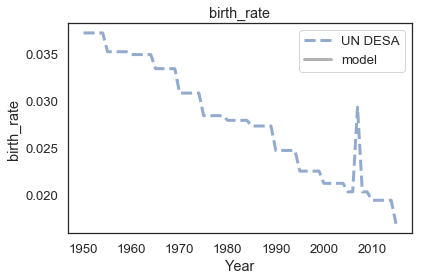

In [23]:
def plot_results(birth_rate, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(birth_rate, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)
birth_rate = tables.birthrate10000/10000
empty = TimeSeries()
plot_results(birth_rate, empty, 'life expectancy')
    
decorate(xlabel='Year', 
             ylabel='birth_rate',
             title='birth_rate')

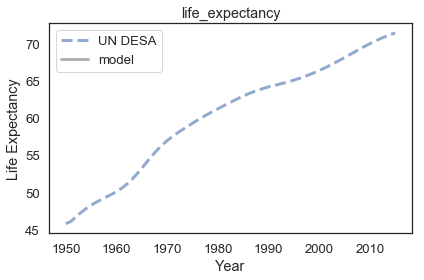

In [24]:
def plot_results( life_expectancy, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(life_expectancy, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)
life_expectancy= tables._expectancyx1000/1000
empty = TimeSeries()
plot_results(life_expectancy, empty, 'life expectancy')
    
decorate(xlabel='Year', 
             ylabel='Life Expectancy',
             title='life_expectancy')

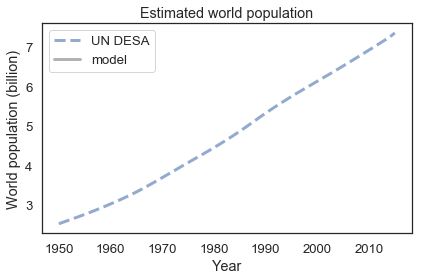

In [25]:
un = tables.UN / 1e9
empty = TimeSeries()
plot_results(un, empty, 'UN DESA')
    
decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title='Estimated world population')


In [34]:
young = get_first_value(un) * 0.438
old= get_first_value(un) * 0.268
middle = get_first_value(un)*0.294
init = State(young=young, middle=middle, old=old)

,values
young,1.106015
middle,0.742394
old,0.676740


In [152]:
death_rate = 1/((life_expectancy)-39);

In [153]:
system = System(birth_rate2 = .08,
                mature_rate = 1/19,
                elder_rate = 1/21,
                t_0 = 1950,
                t_end = 2016,
                init=init)

,values
birth_rate2,0.08
mature_rate,0.0526316
elder_rate,0.047619
t_0,1950
t_end,2016
init,young 1.106015 middle 0.742394 old ...


In [154]:
def update_func1(state, t, system):
    birth_rate2 = birth_rate[t]
    births = birth_rate2 * (state.middle + state.old + state.young)
    #births = system.birth_rate2 * state.middle
    maturings = system.mature_rate * state.young
    agings = system.elder_rate * state.middle
    death_rate2 = death_rate[t]
    deaths = death_rate2 * state.old
    young = state.young + births - maturings
    middle = state.middle + maturings - agings
    old = state.old + agings - deaths
    
    return State(young=young, middle=middle, old=old)
    

In [155]:
state = update_func1(init, system.t_0, system)

,values
young,1.141739
middle,0.765253
old,0.612278


In [156]:
state = update_func1(state, system.t_0, system)

,values
young,1.175365
middle,0.788904
old,0.558412


In [157]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    init: initial State object
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    
    state = system.init
    results[system.t_0] = state.young + state.middle + state.old
    
    for t in linrange(system.t_0, system.t_end):
        state = update_func(state, t, system)
        results[t+1] = state.young + state.middle + state.old
        
    return results

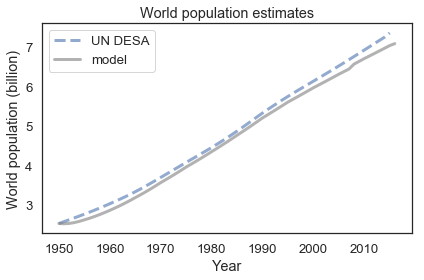

In [158]:
results = run_simulation(system, update_func1);
plot_results(un, results, 'World population estimates')

Interpretation:
It seems like this isn't a very good model. Looking at the first year, 20% of the population is 45 or over, and the life expectancy is 46, which means that theoretically 50% of those people over  44 should die in 1950, which makes very clear that something is wrong.